# NAV Trade Code

In [48]:
# Initial imports
import os
import requests
import pandas as pd
import hvplot.pandas
from dotenv import load_dotenv
# import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
from pathlib import Path
import json

%matplotlib inline

import matplotlib.pyplot as plt

# Importing the warnings package to suppress warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Load .env enviroment variables
# load_dotenv('env.txt')

In [3]:
# Set Alpaca API key and secret
# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
# print(f"Alpaca Key type: {type(alpaca_api_key)}")
# print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

In [5]:
# Create the Alpaca API object
# alpaca = tradeapi.REST(
#     alpaca_api_key,
#     alpaca_secret_key,
#     api_version="v2")

In [6]:
# Set the tickers
# tickers = [
#     "BTC"
#     # "GBTC"
#     # "TSLA"
#     # "EEM"
# ]

# print(tickers)

In [7]:
# Set timeframe to one day ("1Day") for the Alpaca API
# timeframe = "1Day"

In [8]:
# Format start and end dates as ISO format for one year period
# start_time = pd.Timestamp("2022-10-31", tz="America/New_York").isoformat()
# # end_time = pd.Timestamp("2020-10-31", tz="America/New_York").isoformat()
# end_time = pd.Timestamp("2023-10-31", tz="America/New_York").isoformat()

In [9]:
# Get current closing prices for FB and TWTR
# btc_data = alpaca.get_bars(
#     tickers,
#     timeframe,
#     start = start_time,
#     end = end_time
# ).df

# # Display the data
# btc_data.head()

In [10]:
# API URLs
# btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"

In [11]:
# Request the data from the API and explore it
# btc_request = requests.get(btc_url)
# btc_data = btc_request.json()
# print(json.dumps(btc_data, indent=4))

In [12]:
# temp_url = "https://api.alternative.me/GET/v2/stocks/{symbol}/trades"

In [13]:
# api_key = os.getenv("NASDAQ_API_KEY")

In [14]:
# type(api_key)

In [15]:
# # Define the base request URL
# request_url = "https://data.nasdaq.com/api/v3/datasets/WIKI/MSFT.json?api_key="

# # Concatenate request_url and api_key. Store as new variable
# request_url = request_url + api_key

In [16]:
# # Execute get request
# response_data = requests.get(request_url)

In [17]:
# # # Output data
# # response_data.content
# response_data.json()
# # print(json.dumps(x, indent=4))

In [18]:
# Read the GBTC Data
gbtc_historical_data = pd.read_csv(
    Path('./Resources/GBTC_Price_Data.csv'),
    index_col='Date',
    parse_dates=True
)

# Remove the dollar signs
gbtc_historical_data['Close/Last'] = gbtc_historical_data['Close/Last'].str.replace("$","")
gbtc_historical_data['Open'] = gbtc_historical_data['Open'].str.replace("$","")
gbtc_historical_data['High'] = gbtc_historical_data['High'].str.replace("$","")
gbtc_historical_data['Low'] = gbtc_historical_data['Low'].str.replace("$","")

# Cast the string numbers as floats
gbtc_historical_data['Close/Last'] = gbtc_historical_data['Close/Last'].astype(float).round(2)
gbtc_historical_data['Open'] = gbtc_historical_data['Open'].astype(float).round(2)
gbtc_historical_data['High'] = gbtc_historical_data['High'].astype(float).round(2)
gbtc_historical_data['Low'] = gbtc_historical_data['Low'].astype(float).round(2)

display(gbtc_historical_data.head())

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-11-01,26.89,3498576.0,27.00,27.27,26.71
2023-10-31,26.76,2940913.0,26.50,26.83,26.13
2023-10-30,26.48,4704114.0,25.70,26.97,25.70
2023-10-27,25.07,3978757.0,25.86,26.40,24.85
2023-10-26,25.77,5328245.0,26.44,26.50,25.36


In [19]:
# Read the BTC Data
btc_historical_data = pd.read_csv(
    Path('./Resources/BTC_Price_Data.csv'), index_col='Date', parse_dates=True
)

# Sort the index
btc_historical_data.sort_index(ascending=False, inplace=True)

# Cast the string numbers as floats
btc_historical_data['Open'] = btc_historical_data['Open'].astype(float).round(2)
btc_historical_data['High'] = btc_historical_data['High'].astype(float).round(2)
btc_historical_data['Low'] = btc_historical_data['Low'].astype(float).round(2)
btc_historical_data['Close'] = btc_historical_data['Close'].astype(float).round(2)
btc_historical_data['Adj Close'] = btc_historical_data['Adj Close'].astype(float).round(2)
btc_historical_data['Volume'] = btc_historical_data['Volume'].astype(float).round(2)

display(btc_historical_data.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-03,34942.47,34942.47,34692.80,34692.80,34692.80,2.069136e+10
2023-11-02,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,34657.27,35527.93,34170.69,35437.25,35437.25,2.244627e+10
2023-10-31,34500.08,34719.25,34083.31,34667.78,34667.78,1.575827e+10
2023-10-30,34531.74,34843.93,34110.97,34502.36,34502.36,1.718486e+10


In [20]:
# Read the GBTC holdings
# Read the BTC Data
gbtc_holdings_data = pd.read_csv(
    Path('./Resources/GBTC_Holdings.csv')
    # , index_col='Date', parse_dates=True
)

# Extract the month number from the month name by mapping a dictionary to the dataset
# Create the map
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
# Apply the map
gbtc_holdings_data['month_number'] = gbtc_holdings_data.Month.map(month_map)

# Create a column "year_month" to be merged later
gbtc_holdings_data['year_month'] = gbtc_holdings_data['Year'].astype(str) + "_" + gbtc_holdings_data['month_number'].astype(str)

gbtc_holdings_data['GBTC Holdings (BTC)'] =  gbtc_holdings_data['GBTC Holdings (BTC)'].replace(",","",regex=True).astype(int)

gbtc_holdings_data.head(15)

,Month,Year,GBTC Holdings (BTC),month_number,year_month
0,Jan,2023,635420,1,2023_1
1,Feb,2023,635420,2,2023_2
2,Mar,2023,635420,3,2023_3
3,Apr,2023,635420,4,2023_4
4,May,2023,635420,5,2023_5
5,Jun,2023,635420,6,2023_6
6,Jul,2023,635420,7,2023_7
7,Aug,2023,635420,8,2023_8
8,Sep,2023,635420,9,2023_9
9,Oct,2023,635420,10,2023_10


In [21]:
# Reorganize the dataframe

# Isolate the closing price and rename the one column to be GBTC_Close
GBTC = gbtc_historical_data[['Close/Last']].rename(columns={'Close/Last' : 'GBTC_Close'})

# GBTC.head()

# Isolate the closing price and rename the one column to be BTC_Close
BTC = btc_historical_data[['Close']].rename(columns={'Close' : 'BTC_Close'})

# BTC.head()

# Combine the two dataframes into one dataframe based on the date
combined_df = pd.concat([GBTC,BTC],axis="columns", join="inner")

# Create a column "year_month" to be merged later
combined_df['year_month'] = combined_df.index.year.astype(str) + "_" + combined_df.index.month.astype(str)

# Create a "date" column in addition to the index, because the index will be lost after the merge
combined_df['Date'] = combined_df.index

combined_df.head()

,GBTC_Close,BTC_Close,year_month,Date
Date,,,,
2023-11-01,26.89,35437.25,2023_11,2023-11-01
2023-10-31,26.76,34667.78,2023_10,2023-10-31
2023-10-30,26.48,34502.36,2023_10,2023-10-30
2023-10-27,25.07,33909.80,2023_10,2023-10-27
2023-10-26,25.77,34156.65,2023_10,2023-10-26


In [44]:
# Merge the dataframes for pricing information and GBTC holdings into one dataframe
merged_df = combined_df.merge(gbtc_holdings_data, left_on="year_month", right_on="year_month")[['Date', 'GBTC_Close', 'BTC_Close', 'GBTC Holdings (BTC)']]

# Assume that there are 692,314,200 outstanding shares throughout the time period
merged_df['GBTC_Shares'] = int(692314200)

# Add a holdings/share column
merged_df['GBTC_Assets_per_Share'] = ( merged_df['GBTC Holdings (BTC)'] * merged_df['BTC_Close'] ) / merged_df['GBTC_Shares']

# Calculate the premium or discount for GBTC
merged_df['Premium/Discount'] = merged_df['GBTC_Close'] - merged_df['GBTC_Assets_per_Share']

# Calculate the percent premium or discount
merged_df['Discount_to_NAV'] = (merged_df['Premium/Discount'] / merged_df['GBTC_Assets_per_Share']) * 100

# Set the index of the merged dataframe to be the date
merged_df.set_index('Date', inplace=True)

# Remove everything before 1/1/2020
merged_df = merged_df.drop(merged_df.index[merged_df.index < '2020-01-01'])

merged_df

,GBTC_Close,BTC_Close,GBTC Holdings (BTC),GBTC_Shares,GBTC_Assets_per_Share,Premium/Discount,Discount_to_NAV
Date,,,,,,,
2023-11-01,26.89,35437.25,635420,692314200,32.525026,-5.635026,-17.325201
2023-10-31,26.76,34667.78,635420,692314200,31.818791,-5.058791,-15.898753
2023-10-30,26.48,34502.36,635420,692314200,31.666965,-5.186965,-16.379735
2023-10-27,25.07,33909.80,635420,692314200,31.123101,-6.053101,-19.448902
2023-10-26,25.77,34156.65,635420,692314200,31.349665,-5.579665,-17.798166
...,...,...,...,...,...,...,...
2020-01-08,9.32,8079.86,564367,692314200,6.586614,2.733386,41.499109
2020-01-07,10.10,8163.69,564367,692314200,6.654951,3.445049,51.766702
2020-01-06,8.99,7769.22,564367,692314200,6.333384,2.656616,41.946242


In principle:

Total value of GBTC = Total value of GBTCs assets

( GBTC_Close * Number_of_shares ) = ( BTC_Close * GBTC_Holdings )

Or Alteratively:

GBTC_Close = ( BTC_Close * GBTC_Holdings ) / Number_of_shares

In [39]:
close_vs_holdings_per_share = merged_df[['GBTC_Close','GBTC_Assets_per_Share']]

close_vs_holdings_per_share = close_vs_holdings_per_share.rename(columns={'GBTC_Close':'GBTC Closing Price', 'GBTC_Assets_per_Share':'GBTC Assets/Share'})

close_vs_holdings_per_share

,GBTC Closing Price,GBTC Assets/Share
Date,,
2023-11-01,26.89,32.525026
2023-10-31,26.76,31.818791
2023-10-30,26.48,31.666965
2023-10-27,25.07,31.123101
2023-10-26,25.77,31.349665
...,...,...
2020-01-08,9.32,6.586614
2020-01-07,10.10,6.654951
2020-01-06,8.99,6.333384


In [46]:
close_vs_holdings_per_share.hvplot(
    xlabel="Date",
    ylabel="Dollars",
    title="GBTC Closing Price vs. Assets/Share",
    # width=1500,
    width=1200,
    height=500
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

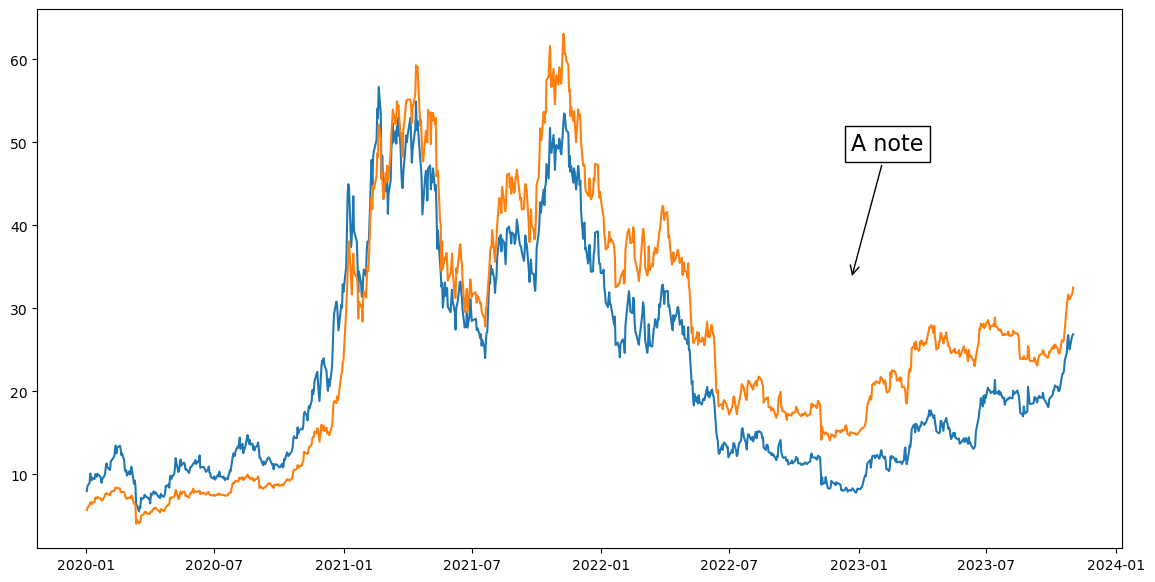

In [62]:
# Matplotlib

x = close_vs_holdings_per_share.index
y = close_vs_holdings_per_share['GBTC Closing Price']
z = close_vs_holdings_per_share['GBTC Assets/Share']

plt.figure(figsize=(14,7))

plt.plot(x, y)
plt.plot(x, z)

plt.annotate(
    r'A note', #Annotation text
    xycoords='axes fraction', # How the coordinates are interpreted
    xy = (0.75,0.5), # Location of the annotation point: 75% to the right, 50% up
    xytext=(0.75,0.75), # Location of the annotation text
    verticalalignment = 'center', 
    bbox=dict(boxstyle='square', facecolor='white', alpha=1.0), # Box properties if we want a box around the text
    arrowprops=dict(arrowstyle='->', color='k'), # Arrow properties
    size=16
)

plt.show()

# print(x)

In [ ]:
"""
Other plot ideas:
    1) Add volume
    2) Discount/surplus
    3) Annotations
"""